In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

client_df_old=pd.read_csv('../data/cleaned_client_data.csv',index_col=0)
new_columns=pd.read_csv('../data/new_columns_task3.csv')

In [31]:
# New dataset includes same information from client_id plus price data for customers which all start with column name "var", we will use them and append to our cleaned and imputed client dataset.
columns_starting_with_id_or_var = new_columns.filter(regex='^(id|var)')


In [32]:
columns_starting_with_id_or_var

,id,var_year_price_off_peak_var,var_year_price_peak_var,var_year_price_mid_peak_var,var_year_price_off_peak_fix,var_year_price_peak_fix,var_year_price_mid_peak_fix,var_year_price_off_peak,var_year_price_peak,var_year_price_mid_peak,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak
0,24011ae4ebbe3035111d65fa7c15bc57,0.000061,2.627605e-05,4.402763e-04,1.102785e+00,49.550703,22.022535,1.102846,4.955073e+01,22.022975,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01
1,d29c2c54acc38ff3c0614d0a653813dd,0.000005,6.089453e-04,0.000000e+00,6.464779e-03,0.000000,0.000000,0.006470,6.089453e-04,0.000000,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00
2,764c75f661154dac3a6c254cd082ea7d,0.000006,2.558511e-07,0.000000e+00,7.661891e-03,0.000000,0.000000,0.007668,2.558511e-07,0.000000,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00
3,bba03439a292a1e166f80264c16191cb,0.000005,0.000000e+00,0.000000e+00,6.464721e-03,0.000000,0.000000,0.006470,0.000000e+00,0.000000,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00
4,149d57cf92fc41cf94415803a877cb4b,0.000015,3.552481e-06,2.522046e-06,5.428942e-03,0.001954,0.000869,0.005444,1.957971e-03,0.000871,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,0.000015,0.000000e+00,0.000000e+00,8.380216e-03,0.000000,0.000000,0.008395,0.000000e+00,0.000000,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00
14602,d0a6f71671571ed83b2645d23af6de00,0.000013,3.472391e-06,1.638788e-08,1.358132e-02,0.005165,0.000272,0.013595,5.168489e-03,0.000272,0.000009,2.225451e-06,1.802667e-08,0.014939,0.005682,0.000299,0.014948,5.684001e-03,2.987132e-04
14603,10e6828ddd62cbcf687cb74928c4c2d2,0.000016,3.957295e-06,1.871602e-06,4.021438e-03,0.001448,0.000643,0.004037,1.451675e-03,0.000645,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10
14604,1cf20fd6206d7678d5bcafd28c53b4db,0.000005,6.089453e-04,0.000000e+00,6.464769e-03,0.000000,0.000000,0.006470,6.089453e-04,0.000000,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00


In [33]:
client_df=pd.merge(client_df_old,columns_starting_with_id_or_var,on='id',how='left')

### Feature Engineering

As per task by BCG, first already given feature engineering is below:

In [34]:
price_df = pd.read_csv('../data/price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [35]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


In [36]:
print(diff.offpeak_diff_dec_january_energy.mean())
diff.info()

-0.0045450493793489
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               16096 non-null  object 
 1   offpeak_diff_dec_january_energy  16096 non-null  float64
 2   offpeak_diff_dec_january_power   16096 non-null  float64
dtypes: float64(2), object(1)
memory usage: 377.4+ KB


This new features introduces the price change at the start of the year compared the last price the customer paid in december. Previously in our eda_analysis, we had a price lineplot, on that plot there seemed to be difference between first month and last month price. This feature introduces that insight into dataset in order to improve the accuracy.

The features that I will implement:

<strong>Date related</strong>: 

From the dataset we can observe that dataset is in the perspective of 2016-01-29 (last date in date_modif_prod). We can create new features and find date differences to this date that explains date values better for model.
- date_end: We will find the difference between end of the contract and 2016-01-29.
- date_modif_prod: Find difference between 2016-01-29 and last date the contract was modified.

<strong>Cost of Energy Consumption</strong>:

We have the both the prices and consumption information. We can create a column that contains total cost of yearly consumption. As we don't have the monthly consumption information, we will find average price from yearly price data, to not pike the price to low levels because of zero values, we will only use non-zero valeus for mean.

In [37]:
from datetime import datetime

# Define reference date and re-define dates as datetime.
referance_date = datetime(2016, 1, 29)  # Last date we have.

# We change the two date feature below to year format.
client_df["date_activ"] = pd.to_datetime(client_df["date_activ"], format='%Y-%m-%d')
client_df["date_renewal"] = pd.to_datetime(client_df["date_renewal"], format='%Y-%m-%d')

# We will use these two features to generate new features.
client_df["date_end"] = pd.to_datetime(client_df["date_end"], format='%Y-%m-%d')
client_df["date_modif_prod"] = pd.to_datetime(client_df["date_modif_prod"], format='%Y-%m-%d')

In [38]:
import numpy as np

client_df['days_to_contract_end']=client_df.date_end.apply(lambda x: (x-referance_date).days)
client_df['days_from_last_modification']=client_df.date_modif_prod.apply(lambda x: (referance_date-x).days)
client_df['days_activ']=client_df.date_activ.apply(lambda x: (referance_date-x).days)
client_df['days_renewal']=client_df.date_renewal.apply(lambda x: (referance_date-x).days)

client_df.drop(columns=['date_activ','date_renewal','date_end','date_modif_prod'], inplace=True)

In [39]:
client_df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,days_to_contract_end,days_from_last_modification,days_activ,days_renewal
0,24011ae4ebbe3035111d65fa7c15bc57,channel_1,0,54946,0,0.00,0,0.0,1.78,0.114481,...,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,138,89,958,220
1,d29c2c54acc38ff3c0614d0a653813dd,channel_2,4660,0,0,189.95,0,0.0,16.27,0.145711,...,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,214,2352,2352,151
2,764c75f661154dac3a6c254cd082ea7d,channel_1,544,0,0,47.96,0,0.0,38.72,0.165794,...,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,78,2114,2114,287
3,bba03439a292a1e166f80264c16191cb,channel_2,1584,0,0,240.04,0,0.0,19.83,0.146694,...,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,61,2131,2131,304
4,149d57cf92fc41cf94415803a877cb4b,channel_1,4425,0,526,445.75,526,0.0,131.73,0.116900,...,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,38,2207,2207,326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,channel_1,32270,47940,0,4648.01,0,0.0,18.57,0.138305,...,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,100,266,1345,613
14602,d0a6f71671571ed83b2645d23af6de00,channel_1,7223,0,181,631.69,181,0.0,144.03,0.100167,...,0.014939,0.005682,0.000299,0.014948,5.684001e-03,2.987132e-04,211,1250,1250,154
14603,10e6828ddd62cbcf687cb74928c4c2d2,channel_1,1844,0,179,190.39,179,0.0,129.60,0.116900,...,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,9,1451,1451,354
14604,1cf20fd6206d7678d5bcafd28c53b4db,channel_1,131,0,0,19.34,0,0.0,7.18,0.145711,...,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,214,1247,1247,151


In [40]:
import numpy as np

# Function to calculate mean excluding zeros
def mean_without_zeros(series):
    non_zero_values = series.replace(0, np.nan)  # Replace zeros with NaN
    return non_zero_values.mean()  # NaN values are ignored when calculating the mean

# Apply the custom aggregation function for each price feature
yearly_price = price_df.groupby('id').agg({
    'price_off_peak_var': mean_without_zeros,
    'price_peak_var': mean_without_zeros,
    'price_mid_peak_var': mean_without_zeros
}).reset_index()

# Now, calculate the mean of the three price features for the yearly average price per customer
yearly_price['average_yearly_price'] = yearly_price[['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var']].mean(axis=1)
yearly_price.fillna(0,inplace=True)

# Merge the yearly average price with consumption data on 'id'
client_df = pd.merge(client_df, yearly_price[['id', 'average_yearly_price']], on='id')

# Calculate the total cost by multiplying the yearly average price with the consumption
client_df['total_cost'] = client_df['average_yearly_price'] * client_df['cons_12m']


### IMPORTANT NOTE!

The new created total_cost features makes the following assumption: Majority of consumption is made from electricity, thus electricity is selected as main factor in finding total cost. 

This is not fully true in physics sence as the units of energy and electricity does not meet. However <strong>purpose of the feature is to introduce a connection with electiricity consumption and average price to find a hypothetical yearly cost to customer.</strong>

In [41]:
#And finally add the given feature by BCG for the task
client_df=pd.merge(client_df,diff,on='id')

In [42]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 48 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               14606 non-null  object 
 1   channel_sales                    14606 non-null  object 
 2   cons_12m                         14606 non-null  int64  
 3   cons_gas_12m                     14606 non-null  int64  
 4   cons_last_month                  14606 non-null  int64  
 5   forecast_cons_12m                14606 non-null  float64
 6   forecast_cons_year               14606 non-null  int64  
 7   forecast_discount_energy         14606 non-null  float64
 8   forecast_meter_rent_12m          14606 non-null  float64
 9   forecast_price_energy_off_peak   14606 non-null  float64
 10  forecast_price_energy_peak       14606 non-null  float64
 11  forecast_price_pow_off_peak      14606 non-null  float64
 12  has_gas           

We currently have 50 features, which is of course a lot. We can remove two features from the dataset:

- The next step will be creating the predictive model and for the model training, the "id" information is not useful.
- At this point since we have a lot of data, we are in risk of dimentionality curse. In EDA we made a point in heatmap that two feature had correlation factor of 1. Lets also take a description of these two data below quickly. One the features can be removed as they contain identical trend and size.

In [43]:
client_df[['margin_gross_pow_ele','margin_net_pow_ele']].describe()

,margin_gross_pow_ele,margin_net_pow_ele
count,14606.000000,14606.000000
mean,24.565121,24.562517
std,20.231172,20.230280
min,0.000000,0.000000
25%,14.280000,14.280000
50%,21.640000,21.640000
75%,29.880000,29.880000
max,374.640000,374.640000


In [44]:
# We will keep net margin on power subscription. We will also drop id here:
client_df.drop(columns=['id','margin_gross_pow_ele'], inplace=True)


In [45]:
#Finally saving the dataframe to csv file for next step, which is creation of predictive model
client_df.to_csv('../data/modelling_dataset.csv')

In [46]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   channel_sales                    14606 non-null  object 
 1   cons_12m                         14606 non-null  int64  
 2   cons_gas_12m                     14606 non-null  int64  
 3   cons_last_month                  14606 non-null  int64  
 4   forecast_cons_12m                14606 non-null  float64
 5   forecast_cons_year               14606 non-null  int64  
 6   forecast_discount_energy         14606 non-null  float64
 7   forecast_meter_rent_12m          14606 non-null  float64
 8   forecast_price_energy_off_peak   14606 non-null  float64
 9   forecast_price_energy_peak       14606 non-null  float64
 10  forecast_price_pow_off_peak      14606 non-null  float64
 11  has_gas                          14606 non-null  int64  
 12  imp_cons          

### Part 2:

This part is initialized after having low true positive accuracy in our models. Thus, We further investigate the dataset.

In [47]:
# We want check numerical data, especially consumptions and forecasts:
consumption = client_df[[    'cons_12m', 
                            'cons_gas_12m', 
                            'cons_last_month',
                            'forecast_cons_12m', 
                            'forecast_cons_year', 
                            'forecast_discount_energy',
                            'forecast_meter_rent_12m', 
                            'forecast_price_energy_off_peak',
                            'forecast_price_energy_peak', 
                            'forecast_price_pow_off_peak',
                            'imp_cons']]

<Axes: xlabel='cons_12m', ylabel='Count'>

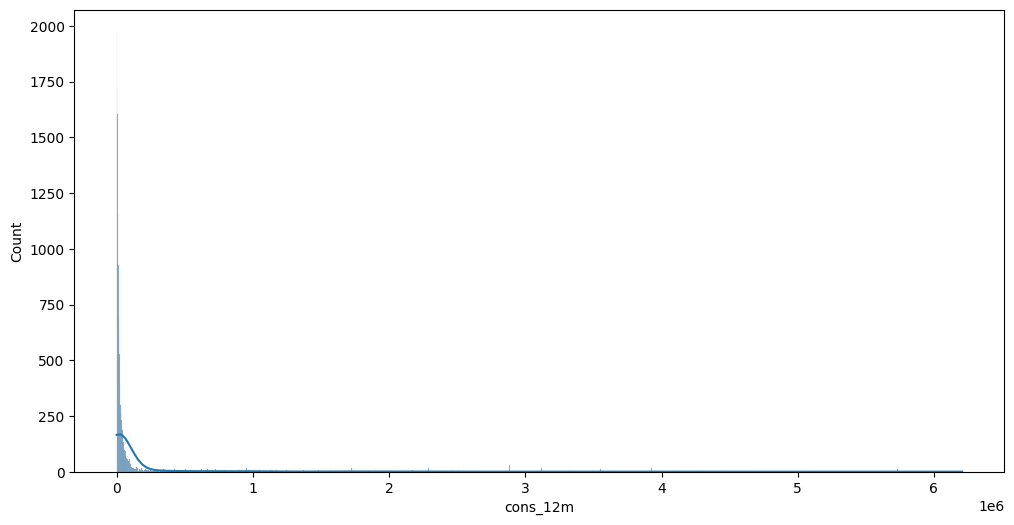

In [48]:
plt.figure(figsize=(12,6))

sns.histplot(data=consumption, x="cons_12m",kde=True)

This distrubition is really skewed at the beginning.

In [49]:
from scipy.stats import yeojohnson, skew

consumption['cons_12m'].skew()

5.997308122068939

### What is skewness?

Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive, negative, or undefined.

Positive Skewness: When the tail on the right side of the distribution is longer or fatter, the distribution is said to be right-skewed, or positively skewed. This means that the right tail of the distribution is longer or fatter than the left tail. In such cases, the mean and median will be greater than the mode.

Negative Skewness: Conversely, when the tail on the left side of the distribution is longer or fatter, the distribution is left-skewed, or negatively skewed. Here, the left tail is longer or fatter than the right tail, and the mean and median will be less than the mode.

Zero Skewness: If the skewness is zero, the data are perfectly symmetrical, although this is quite rare in real-world data.

In terms of thresholds:

- A skewness between -0.5 and 0.5 is usually considered fairly symmetrical.
- Between -1 and -0.5 (negatively skewed) or between 0.5 and 1 (positively skewed) would indicate moderate skewness.
- A skewness less than -1 (negatively skewed) or greater than 1 (positively skewed) is usually regarded as substantial skewness, indicating that the data are highly skewed.

From the skewness description we can clearly say our data is skewed highly. Which might be reason why we had low true positive accuracy.

In [50]:
for column in consumption.columns:
    print(column,": ",consumption[column].skew())

cons_12m :  5.997308122068939
cons_gas_12m :  9.59752998980867
cons_last_month :  6.391406974903164
forecast_cons_12m :  7.155852615615487
forecast_cons_year :  16.587989682280156
forecast_discount_energy :  5.155098289065647
forecast_meter_rent_12m :  1.5051478520584571
forecast_price_energy_off_peak :  -0.11958602474988272
forecast_price_energy_peak :  -0.014331427861824115
forecast_price_pow_off_peak :  -4.998771993850156
imp_cons :  13.19879897169991


It seems most of the columns in numerical consumption and forecast data is highly skewed.

To adress this we can use log transformation

In [51]:
import numpy as np

# Apply log10 transformation, addition of plus + 1 for log function incase there are values that equal to 0
client_df["cons_12m"] = np.log10(client_df["cons_12m"] + 1)
client_df["cons_gas_12m"] = np.log10(client_df["cons_gas_12m"] + 1)
client_df["cons_last_month"] = np.log10(client_df["cons_last_month"] + 1)
client_df["forecast_cons_12m"] = np.log10(client_df["forecast_cons_12m"] + 1)
client_df["forecast_discount_energy "] = np.log10(client_df["forecast_discount_energy"] + 1)
client_df["forecast_cons_year"] = np.log10(client_df["forecast_cons_year"] + 1)
client_df["forecast_meter_rent_12m"] = np.log10(client_df["forecast_meter_rent_12m"] + 1)
client_df["forecast_price_pow_off_peak"] = np.log10(client_df["forecast_price_pow_off_peak"] + 1)
client_df["imp_cons"] = np.log10(client_df["imp_cons"] + 1)

In [52]:
# We want check numerical data, especially consumptions and forecasts:
consumption = client_df[[    'cons_12m', 
                            'cons_gas_12m', 
                            'cons_last_month',
                            'forecast_cons_12m', 
                            'forecast_cons_year', 
                            'forecast_discount_energy',
                            'forecast_meter_rent_12m', 
                            'forecast_price_energy_off_peak',
                            'forecast_price_energy_peak', 
                            'forecast_price_pow_off_peak',
                            'imp_cons']]

for column in consumption.columns:
    print(column,": ",consumption[column].skew())

cons_12m :  -0.37954079901387705
cons_gas_12m :  1.8757249574656631
cons_last_month :  -0.19069689408438098
forecast_cons_12m :  -2.0327515916178744
forecast_cons_year :  -0.11864865052965691
forecast_discount_energy :  5.155098289065647
forecast_meter_rent_12m :  -0.6036375456526835
forecast_price_energy_off_peak :  -0.11958602474988272
forecast_price_energy_peak :  -0.014331427861824115
forecast_price_pow_off_peak :  -11.630457068079624
imp_cons :  0.011929036646801736


In [53]:
client_df.drop(columns=['forecast_discount_energy','forecast_price_pow_off_peak'])

,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,has_gas,...,var_6m_price_mid_peak,days_to_contract_end,days_from_last_modification,days_activ,days_renewal,average_yearly_price,total_cost,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,forecast_discount_energy
0,channel_1,0.000000,4.739944,0.000000,0.000000,0.000000,0.444045,0.114481,0.098142,1,...,4.423670e+01,138,89,958,220,0.099372,0.000000,0.020057,3.700961,0.0
1,channel_2,3.668479,0.000000,0.000000,2.280920,0.000000,1.237292,0.145711,0.000000,0,...,0.000000e+00,214,2352,2352,151,0.117546,547.764166,-0.003767,0.177779,0.0
2,channel_1,2.736397,0.000000,0.000000,1.689841,0.000000,1.599009,0.165794,0.087899,0,...,0.000000e+00,78,2114,2114,287,0.129466,70.429753,-0.004670,0.177779,0.0
3,channel_2,3.200029,0.000000,0.000000,2.382089,0.000000,1.318689,0.146694,0.000000,0,...,0.000000e+00,61,2131,2131,304,0.151210,239.516772,-0.004547,0.177779,0.0
4,channel_1,3.646011,0.000000,2.721811,2.650065,2.721811,2.122969,0.116900,0.100015,0,...,4.860000e-10,38,2207,2207,326,0.100226,443.499681,-0.006192,0.162916,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,channel_1,4.508812,4.680707,0.000000,3.667360,0.000000,1.291591,0.138305,0.000000,1,...,0.000000e+00,100,266,1345,613,0.144124,4650.894926,-0.008653,0.177779,0.0
14602,channel_1,3.858778,0.000000,2.260071,2.801191,2.260071,2.161458,0.100167,0.091892,0,...,2.987132e-04,211,1250,1250,154,0.091007,657.345567,-0.007395,0.236694,0.0
14603,channel_1,3.265996,0.000000,2.255273,2.281919,2.255273,2.115943,0.116900,0.100015,0,...,4.860000e-10,9,1451,1451,354,0.100431,185.194457,-0.006192,0.162916,0.0
14604,channel_1,2.120574,0.000000,0.000000,1.308351,0.000000,0.912753,0.145711,0.000000,0,...,0.000000e+00,214,1247,1247,151,0.117546,15.398521,-0.003767,0.177779,0.0


<Axes: xlabel='cons_12m', ylabel='Count'>

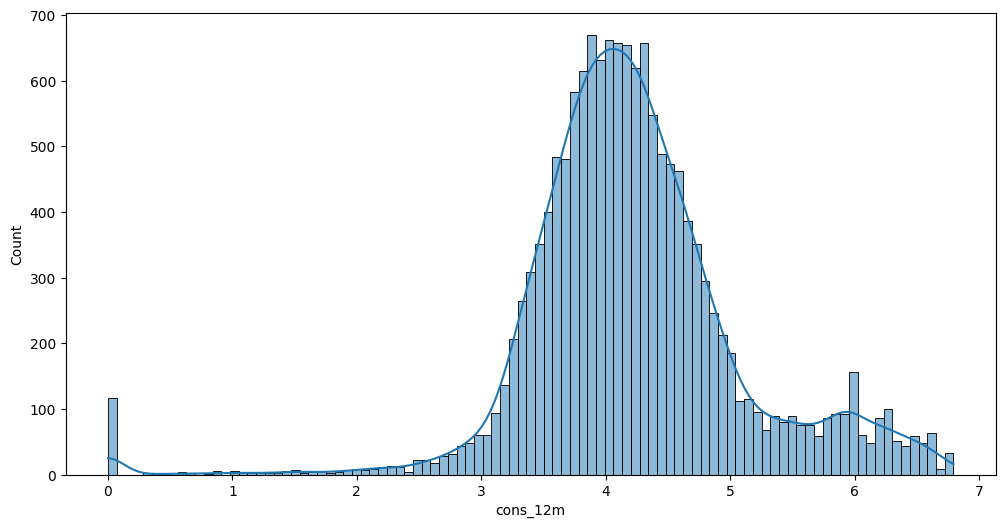

In [54]:
plt.figure(figsize=(12,6))

sns.histplot(data=consumption, x="cons_12m",kde=True)

Now it is looking better. Let's return to the model training to see if we can see increase

In [55]:
#Finally saving the dataframe to csv file for next step, which is creation of predictive model
client_df.to_csv('../data/modelling_dataset_2.csv')